In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [ ]:
ls

1905.03375.pdf  daisyRec/


In [ ]:
cd daisyRec/

/content/drive/MyDrive/Project/daisyRec


In [ ]:
ls

daisy/  images/  log/       README.md         res/      test.py  tune_res/
data/   LICENSE  model.pkl  requirements.txt  setup.py  tune.py  Untitled.ipynb


In [ ]:
!pip3 install optuna 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.7 MB/s eta 0:00:00


In [ ]:
!pip3 install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python3 test.py

15 Apr 20:10 INFO - {'gpu': '1', 'seed': 2022, 'reproducibility': True, 'state': None, 'optimization_metric': 'ndcg', 'hyperopt_trail': 40, 'tune_testset': False, 'tune_pack': '{}', 'algo_name': 'multi-vae', 'val_method': 'tsbr', 'test_method': 'tsbr', 'fold_num': 1, 'val_size': 0.1, 'test_size': 0.2, 'topk': 50, 'cand_num': 1000, 'sample_method': 'uniform', 'sample_ratio': 0, 'num_ng': 4, 'batch_size': 256, 'loss_type': 'BPR', 'init_method': 'default', 'optimizer': 'sgd', 'early_stop': False, 'data_path': 'data/', 'res_path': None, 'dataset': 'amazon-electronic', 'prepro': '10filter', 'level': 'ui', 'UID_NAME': 'user', 'IID_NAME': 'item', 'INTER_NAME': 'rating', 'TID_NAME': 'timestamp', 'binary_inter': True, 'positive_threshold': None, 'metrics': ['recall', 'mrr', 'ndcg', 'hit', 'precision'], 'mlp_hidden_size': None, 'epochs': 100, 'dropout': 0.5, 'lr': 0.001, 'latent_dim': 64, 'total_anneal_steps': 100000, 'anneal_cap': 0.2}
15 Apr 20:10 INFO - Current data path is: data/amazon-elect

In [ ]:
cd tune_res

/content/drive/MyDrive/Project/daisyRec/tune_res


In [ ]:
ls

best_params_BPR_ease_ml-100k_10filter_tsbr.csv
best_params_BPR_mf_ml-100k_10filter_tsbr.csv
best_params_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv
best_params_BPR_multi-vae_ml-100k_10filter_tsbr.csv
best_params_DV_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv
best_params_LD_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv
best_params_LD_BPR_multi-vae_ml-100k_10filter_tsbr.csv


In [ ]:
import pandas as pd

In [ ]:
amaLD=pd.read_csv("best_params_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv")

In [ ]:
amaLD

,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
0,32,0.5,256,0.001,0.2,0.1323
1,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
2,64,0.5,256,0.001,0.2,0.1400
3,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
4,128,0.5,256,0.001,0.2,0.1209
5,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
6,128,0.5,256,0.01,0.2,0.1736
7,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
8,64,0.5,256,0.01,0.2,0.1761


In [ ]:
amaLD.latent_dim.unique

<bound method Series.unique of 0            32
1    latent_dim
2            64
3    latent_dim
4           128
5    latent_dim
6           128
7    latent_dim
8            64
Name: latent_dim, dtype: object>

In [ ]:
amaLD=amaLD[amaLD.latent_dim !='latent_dim']

In [ ]:
amaLD=amaLD.drop_duplicates()

In [ ]:
amaLD2=amaLD[amaLD.lr!='0.01']

In [ ]:
amaLD2

,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
0,32,0.5,256,0.001,0.2,0.1323
2,64,0.5,256,0.001,0.2,0.1400
4,128,0.5,256,0.001,0.2,0.1209


In [ ]:
import matplotlib.pyplot as plt

In [ ]:

amaLD2.ndcg=amaLD2.ndcg.astype(float)

<ipython-input-39-c88db1ad98dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amaLD2.ndcg=amaLD2.ndcg.astype(float)


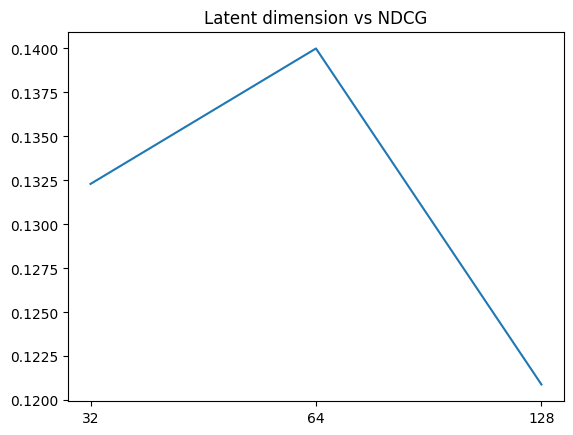

In [ ]:
fig, ax = plt.subplots()
ax.plot(amaLD2['latent_dim'], amaLD2['ndcg'])
ax.set_title('Latent dimension vs NDCG')
plt.show()

In [ ]:
amaLR=pd.read_csv("best_params_LD_BPR_multi-vae_amazon-electronic_10filter_tsbr.csv")

In [ ]:
amaLR=amaLR[amaLR.latent_dim !='latent_dim']

In [ ]:
amaLR=amaLR.astype(float)

In [ ]:
amaLR=amaLR.drop_duplicates()

In [ ]:
amaLR

,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
0,128.0,0.5,256.0,1.000000e-02,0.2,0.1736
2,128.0,0.5,256.0,1.000000e-03,0.2,0.1209
6,128.0,0.5,256.0,1.000000e-04,0.2,0.1172
9,128.0,0.5,256.0,1.000000e-05,0.2,0.1176
11,128.0,0.5,256.0,1.000000e-06,0.2,0.1176
13,128.0,0.5,256.0,1.000000e-07,0.2,0.1176


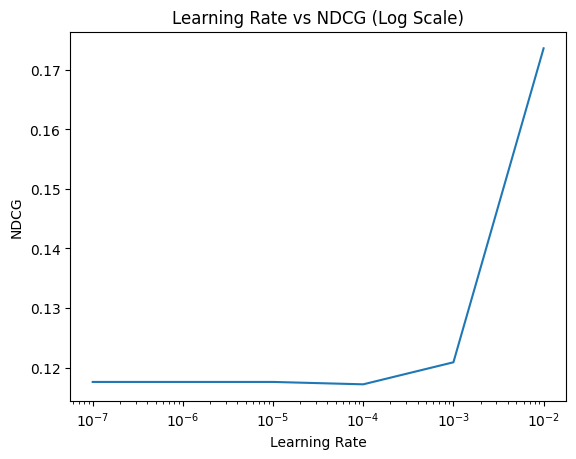

In [ ]:
plt.semilogx(amaLR['lr'], amaLR['ndcg'])
plt.xlabel('Learning Rate')
plt.ylabel('NDCG')
plt.title('Learning Rate vs NDCG (Log Scale)')
plt.show()

In [ ]:
#If your NGCD (normalized gradient coordinate descent) value remains the same for different dropout rates, 
#it may indicate that the dropout regularization technique is not having a significant impact on the training process.



In [ ]:
movLD=pd.read_csv("best_params_LD_BPR_multi-vae_ml-100k_10filter_tsbr.csv")

In [ ]:
movLD

,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
0,32,0.5,256,0.01,0.2,0.5074
1,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
2,64,0.5,256,0.01,0.2,0.5120
3,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
4,64,0.5,256,0.01,0.2,0.5120
5,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
6,128,0.5,256,0.01,0.2,0.5132
7,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg


In [ ]:
movLD=movLD[movLD.latent_dim !='latent_dim']

In [ ]:
movLD

,latent_dim,dropout,batch_size,lr,anneal_cap,ndcg
0,32,0.5,256,0.01,0.2,0.5074
2,64,0.5,256,0.01,0.2,0.5120
4,64,0.5,256,0.01,0.2,0.5120
6,128,0.5,256,0.01,0.2,0.5132


In [ ]:
movLDaLD=movLD.drop_duplicates()

In [ ]:

movLD.ndcg=movLD.ndcg.astype(float)


<ipython-input-23-75b1b80be468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movLD.ndcg=movLD.ndcg.astype(float)


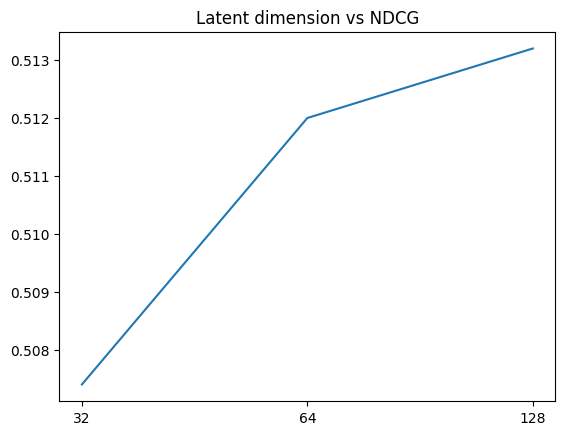

In [ ]:
fig, ax = plt.subplots()
ax.plot(movLD['latent_dim'], movLD['ndcg'])
ax.set_title('Latent dimension vs NDCG')
plt.show()

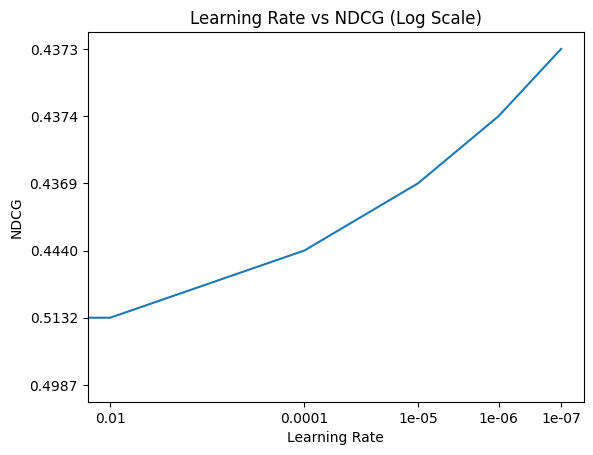

In [ ]:
movLR=pd.read_csv("best_params_BPR_multi-vae_ml-100k_10filter_tsbr.csv")
movLR=movLR[movLR.latent_dim !='latent_dim']
# movLR=movLR.astype(float)
movLR=movLR.drop_duplicates()
plt.semilogx(movLR['lr'], movLR['ndcg'])
plt.xlabel('Learning Rate')
plt.ylabel('NDCG')
plt.title('Learning Rate vs NDCG (Log Scale)')
plt.show()